# In this script, 'raw', a time series of dihedral values with range [0,360] will be processed to give 'con', a time series that is as continuous as possible.

# People call this problem "Phase unwrapping" and it is nontrivial for realistic data. Its uncertainty should be higher when time difference between two MD trajactory frames become higher.

##  I wrote some code based on https://www.ljmu.ac.uk/~/media/files/ljmu/about-us/faculties-and-schools/tae/geri/onedimensionalphaseunwrapping_finalpdf to do phase unwrapping

Raw length is:
2000000
Processed length is:
2000000
Raw data looks like this:
[ 355.4952    7.9304  352.2305 ...,    3.4822    1.1331    6.8959]
Processed data looks like this:
[ 355.4952  367.9304  352.2305 ...,  363.4822  361.1331  366.8959]


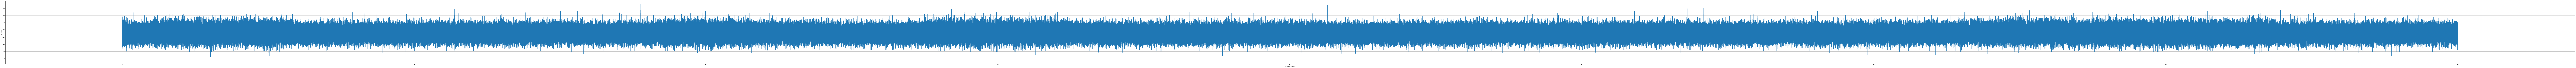

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = "/home/winter/onsager/lr8.dih"
raw = np.genfromtxt(filename, delimiter=' ', skip_header=1, skip_footer=0)
print ('Raw length is:')
print (len(raw))

# Smoothing dihedral time series by certain ratio. This should be better than simply use raw[::10].
ratio = 1
cut = raw[:len(raw)-len(raw)%ratio]
length = int(len(cut)/ratio)
print ('Processed length is:')
print (length)

temp = np.reshape(cut, (length,ratio))
avg = np.zeros(length)

for i in range(0,length):
    avg[i]=np.mean(temp[i,:],axis=0)

# Phase unwrapping. Note that if input data is too bad, i.e. too much oscillation between like -179 and 179, phase unwrapping would fail
con = np.copy(avg)
for i in range(1,length): 
    diff=con[i]-con[i-1]
    if diff > 180:
        con[i:] -= 360
    elif diff < -180:
        con[i:] += 360

print ('Raw data looks like this:')
print (raw)            
print ('Processed data looks like this:')
print (con)       

t = np.linspace(0,len(raw)*0.0002,num=len(con))  # time in ns

plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(400,10))
plt.plot(t,con)
plt.xlabel('simulation time/ns')
plt.ylabel('Dihedral')
plt.grid(True,axis='y')
plt.show()
